In [1]:
import random
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as sm
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

# RQ1

In [45]:
# See the first 5 rows of the dataframe
ds = pd.read_csv("./archive/steam_reviews.csv",nrows=5)
ds.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [46]:
# See the last 5 rows of the dataframe
ds.tail()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [69]:
# Get a concise summary of the dataframe, with columns entries, number of non-zero elements and data types
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217596 entries, 0 to 217595
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      217596 non-null  int64  
 1   app_id                          217596 non-null  int64  
 2   app_name                        217596 non-null  object 
 3   review_id                       217596 non-null  int64  
 4   language                        217596 non-null  object 
 5   review                          217262 non-null  object 
 6   timestamp_created               217596 non-null  int64  
 7   timestamp_updated               217596 non-null  int64  
 8   recommended                     217596 non-null  bool   
 9   votes_helpful                   217596 non-null  int64  
 10  votes_funny                     217596 non-null  int64  
 11  weighted_vote_score             217596 non-null  float64
 12  comment_count   

In [47]:
# See the null elements
columns = ds.columns.values[1:]
dict_count_null = {}
dict_types = {}
for col in columns:
    ds_sub =  pd.read_csv("./archive/steam_reviews.csv",usecols=[col])
    count = ds_sub.isnull().sum()[0]
    dict_count_null[col] = count
    dict_types[col] = ds_sub.dtypes[0].name

print(dict_count_null)
print(dict_types)
#print(ds.isnull().sum())

{'app_id': 0, 'app_name': 0, 'review_id': 0, 'language': 0, 'review': 33742, 'timestamp_created': 0, 'timestamp_updated': 0, 'recommended': 0, 'votes_helpful': 0, 'votes_funny': 0, 'weighted_vote_score': 0, 'comment_count': 0, 'steam_purchase': 0, 'received_for_free': 0, 'written_during_early_access': 0, 'author.steamid': 0, 'author.num_games_owned': 0, 'author.num_reviews': 0, 'author.playtime_forever': 2, 'author.playtime_last_two_weeks': 2, 'author.playtime_at_review': 25682, 'author.last_played': 2}
{'app_id': 'int64', 'app_name': 'object', 'review_id': 'int64', 'language': 'object', 'review': 'object', 'timestamp_created': 'int64', 'timestamp_updated': 'int64', 'recommended': 'bool', 'votes_helpful': 'int64', 'votes_funny': 'int64', 'weighted_vote_score': 'float64', 'comment_count': 'int64', 'steam_purchase': 'bool', 'received_for_free': 'bool', 'written_during_early_access': 'bool', 'author.steamid': 'int64', 'author.num_games_owned': 'int64', 'author.num_reviews': 'int64', 'auth

In [ ]:
# Find the mode of review in the dataframe
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=['review'])
review_mode = ds.review.mode()[0]

# Fill the missing values with mode value of review in dataframe.
ds.review.fillna(review_mode, inplace = True)

# Let's see the null values in the review column.
ds.review.isnull().sum()

0

In [ ]:
ds.columns = ds.columns.str.replace('.','_')

# Dropping the records with playtime_at_review  missing in the dataframe.
ds = ds[~ds.author_playtime_at_review.isnull()].copy()

# Checking the missing values in the dataset.
ds.author_playtime_at_review.isnull().sum()

<ipython-input-27-279f2078ce85>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ds.columns = ds.columns.str.replace('.','_')


255

Want to look at the distribution of all of the features by ploting them.
To do so lets first list all the types of our data from our dataset and take only the numerical ones:
Lets see their statistics and plot them.

Statistics for timestamp_created:
count    2.174737e+07
mean     1.544432e+09
std      5.812194e+07
min      1.290198e+09
25%      1.510223e+09
50%      1.562446e+09
75%      1.589696e+09
max      1.611426e+09

Statistics for timestamp_updated:
count    2.174737e+07
mean     1.547556e+09
std      5.689899e+07
min      1.290198e+09
25%      1.511729e+09
50%      1.572189e+09
75%      1.591403e+09
max      2.283383e+09

Statistics for votes_helpful:
count    2.174737e+07
mean     4.044689e+05
std      1.333741e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.398047e+12

Statistics for votes_funny:
count    2.174737e+07
mean     1.267917e+05
std      2.333553e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.294967e+09

Statistics for weighted_vote_score:
count    2.174737e+07
mean     1.654424e-01
std      2.434006e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+0

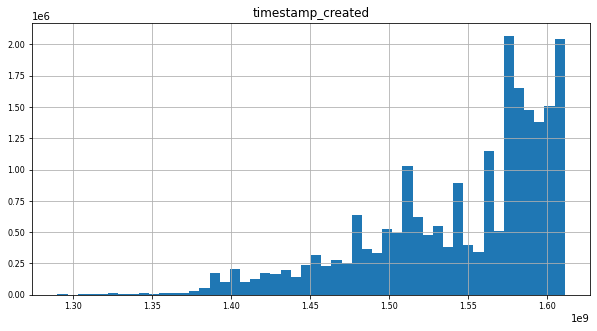

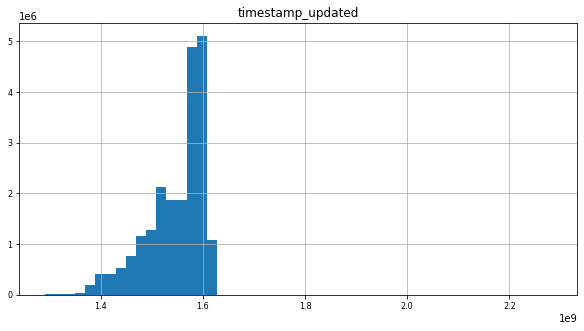

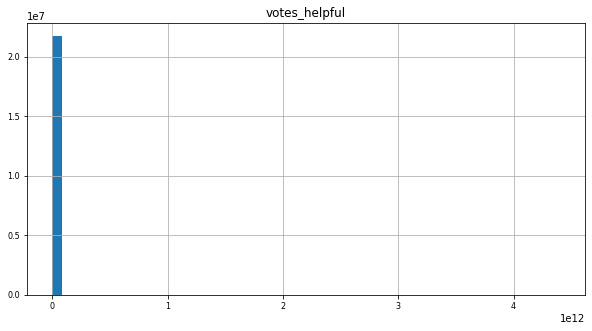

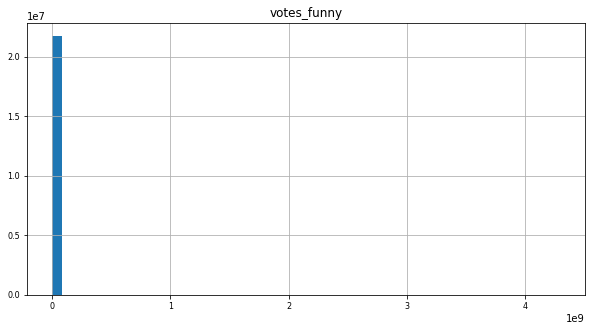

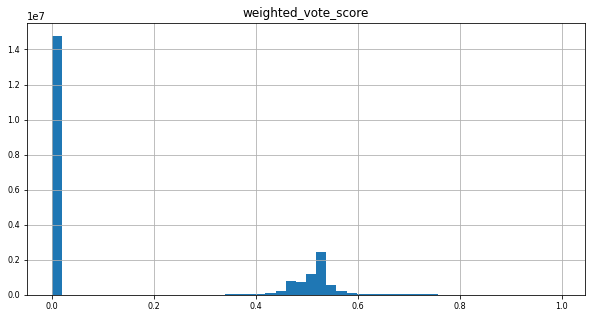

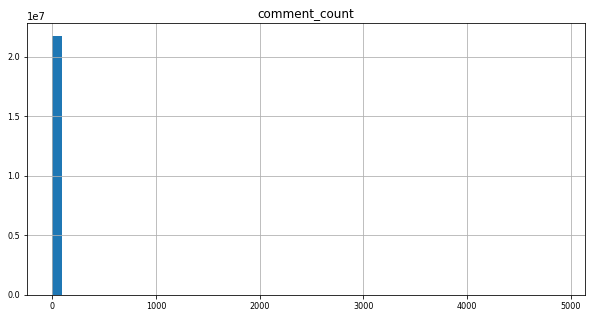

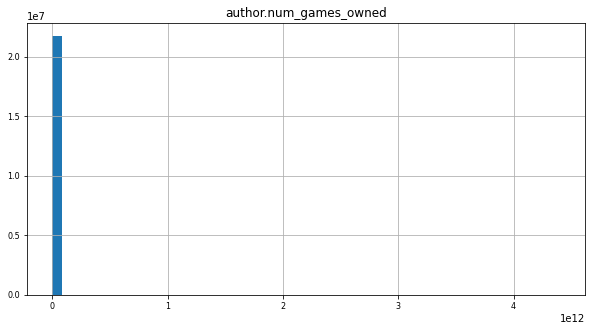

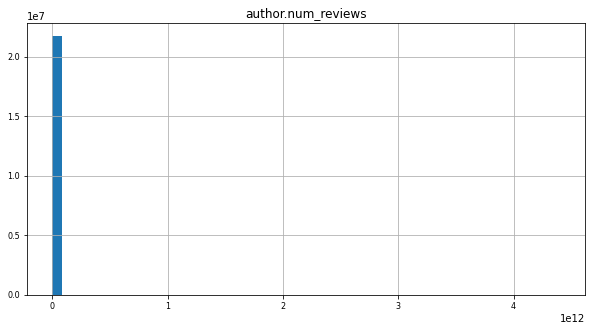

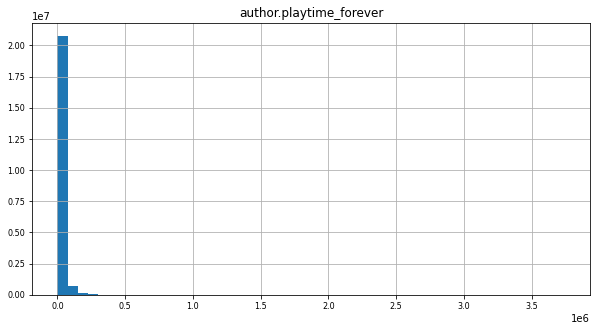

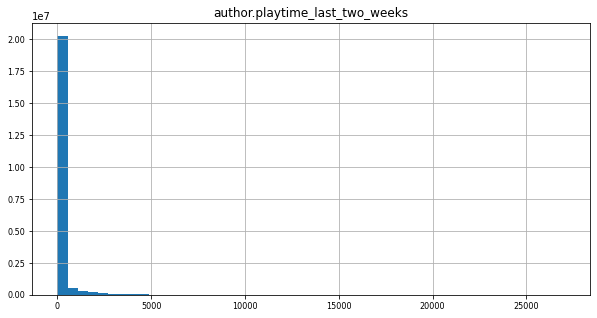

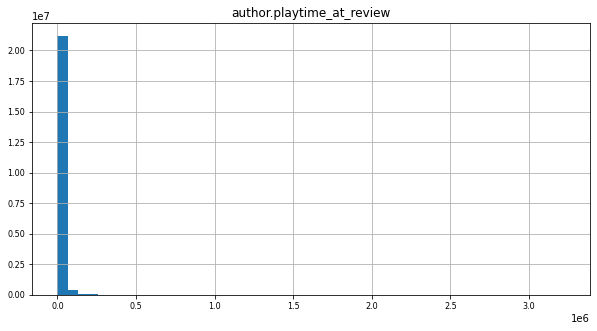

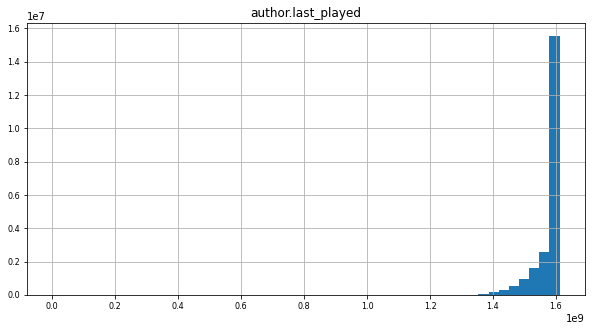

In [49]:
# Want to look at the distribution of all of the features by ploting them.
# To do so lets first list all the types of our data from our dataset and take only the numerical ones:
# Lets see their statistics and plot them.

to_load = []
for k,v in dict_types.items():
    if k[-2:] != 'id':
        if v in ['float64', 'int64']:
            to_load.append(k)
for i in to_load:
    ds = pd.read_csv("./archive/steam_reviews.csv",usecols=[i])
    statss = ds[i].describe()
    print('Statistics for {}:'.format(i))
    print(statss.to_string() + '\n')
    ds.hist(figsize=(10, 5), bins=50, xlabelsize=8, ylabelsize=8)
        
#ds_num = ds.select_dtypes(include = ['float64', 'int64'])
#ds_num_no_id = ds_num.drop(['Unnamed: 0','app_id', 'review_id'], axis=1)

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
Unnamed: 0,1.000000,0.053541,-0.059955,-0.037571,-0.036797,-0.115743,0.011758,0.003807,0.057532,0.016520,-0.054812,0.016378,0.013084,-0.058211,0.021835,0.013888,0.028317,-0.014803,0.023539,-0.025008
app_id,0.053541,1.000000,0.369953,0.374797,0.360332,-0.095071,0.004340,-0.000901,-0.026866,-0.007071,-0.006075,-0.000870,0.159533,0.091266,-0.012267,-0.017861,-0.085989,-0.005906,-0.082927,0.205254
review_id,-0.059955,0.369953,1.000000,0.972895,0.939058,0.071959,-0.024029,-0.006889,-0.228300,-0.054973,0.078997,0.021784,-0.105500,0.443024,-0.177544,-0.076981,-0.071696,0.129721,0.012967,0.539579
timestamp_created,-0.037571,0.374797,0.972895,1.000000,0.965006,0.049125,-0.022051,-0.006677,-0.209932,-0.053514,0.080454,0.030213,-0.104997,0.423698,-0.178474,-0.073671,-0.052430,0.113380,0.025756,0.565257
timestamp_updated,-0.036797,0.360332,0.939058,0.965006,1.000000,0.042763,-0.018320,-0.005460,-0.194142,-0.043780,0.078885,0.028886,-0.115834,0.409953,-0.164099,-0.057492,-0.021795,0.121318,0.061188,0.581333
recommended,-0.115743,-0.095071,0.071959,0.049125,0.042763,1.000000,-0.034432,-0.002229,-0.184777,-0.065803,0.001290,0.005972,-0.051650,0.046338,-0.008370,-0.017623,-0.036502,0.021114,-0.052085,0.090656
votes_helpful,0.011758,0.004340,-0.024029,-0.022051,-0.018320,-0.034432,1.000000,0.000247,0.131431,0.604252,-0.004148,-0.001758,0.003539,-0.021904,0.045448,0.021552,0.014529,-0.003806,0.012406,-0.015475
votes_funny,0.003807,-0.000901,-0.006889,-0.006677,-0.005460,-0.002229,0.000247,1.000000,0.008161,-0.000486,-0.003978,0.003232,0.003312,-0.003162,-0.000026,0.000117,-0.000933,-0.000384,-0.000336,-0.004264
weighted_vote_score,0.057532,-0.026866,-0.228300,-0.209932,-0.194142,-0.184777,0.131431,0.008161,1.000000,0.119418,-0.044383,0.010287,0.051227,-0.155875,0.141558,0.108135,0.046479,-0.020976,0.009029,-0.109684
comment_count,0.016520,-0.007071,-0.054973,-0.053514,-0.043780,-0.065803,0.604252,-0.000486,0.119418,1.000000,-0.009346,0.002753,0.007428,-0.036097,0.067907,0.042582,0.042255,-0.001369,0.033622,-0.028554


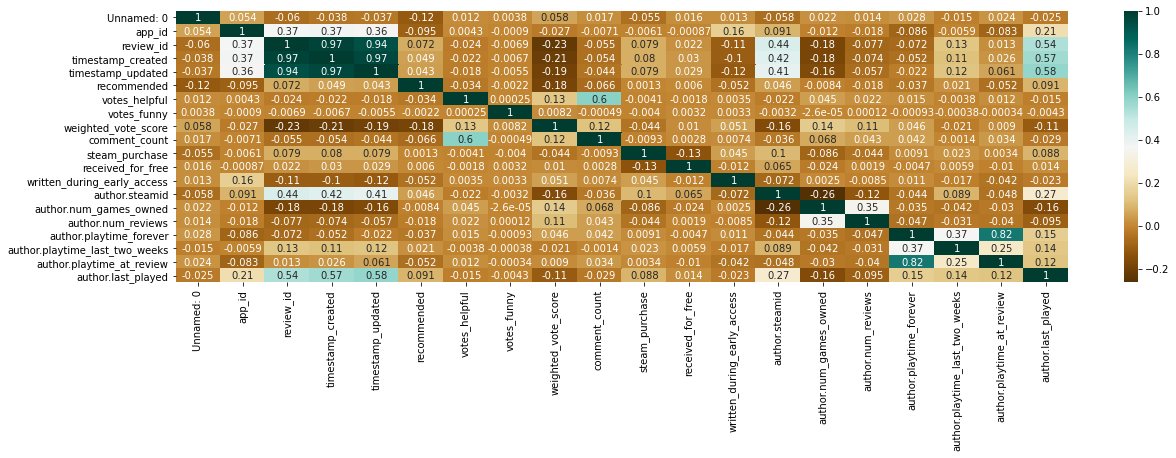

In [ ]:
# See the correlation and the heatmap to find the dependent variables
ds = pd.read_csv("./archive/steam_reviews.csv")
plt.figure(figsize=(20,5))
c = ds.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [67]:
# See the strongly correlated values with the weighted vote score
ds_num = ds.select_dtypes(include = ['float64', 'int64'])
ds_num_no_id = ds_num.drop(['Unnamed: 0','app_id', 'review_id','author.steamid'], axis=1)
ds_num_corr = ds_num_no_id.corr()['weighted_vote_score']
golden_features_list = ds_num_corr[abs(ds_num_corr)- ds_num_corr['weighted_vote_score'] > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with the vote score:\n{}".format(len(golden_features_list), golden_features_list))

# There are no strongly correlated values with the weighted vote score

There is 0 strongly correlated values with the vote score:
Series([], Name: weighted_vote_score, dtype: float64)


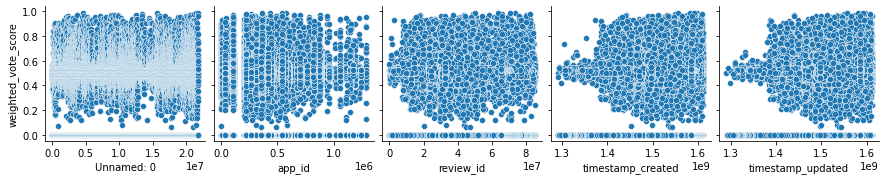

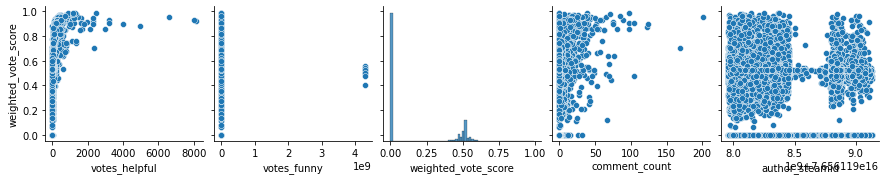

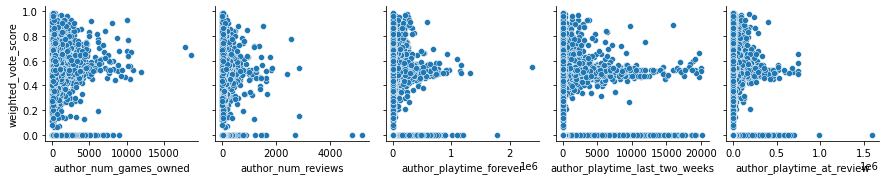

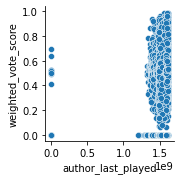

In [ ]:
# Check if they show some kind of pattern

for i in range(0, len(ds_num_no_id.columns), 5):
    sns.pairplot(data=ds_num_no_id,
                x_vars=ds_num_no_id.columns[i:i+5],
                y_vars=['weighted_vote_score'])

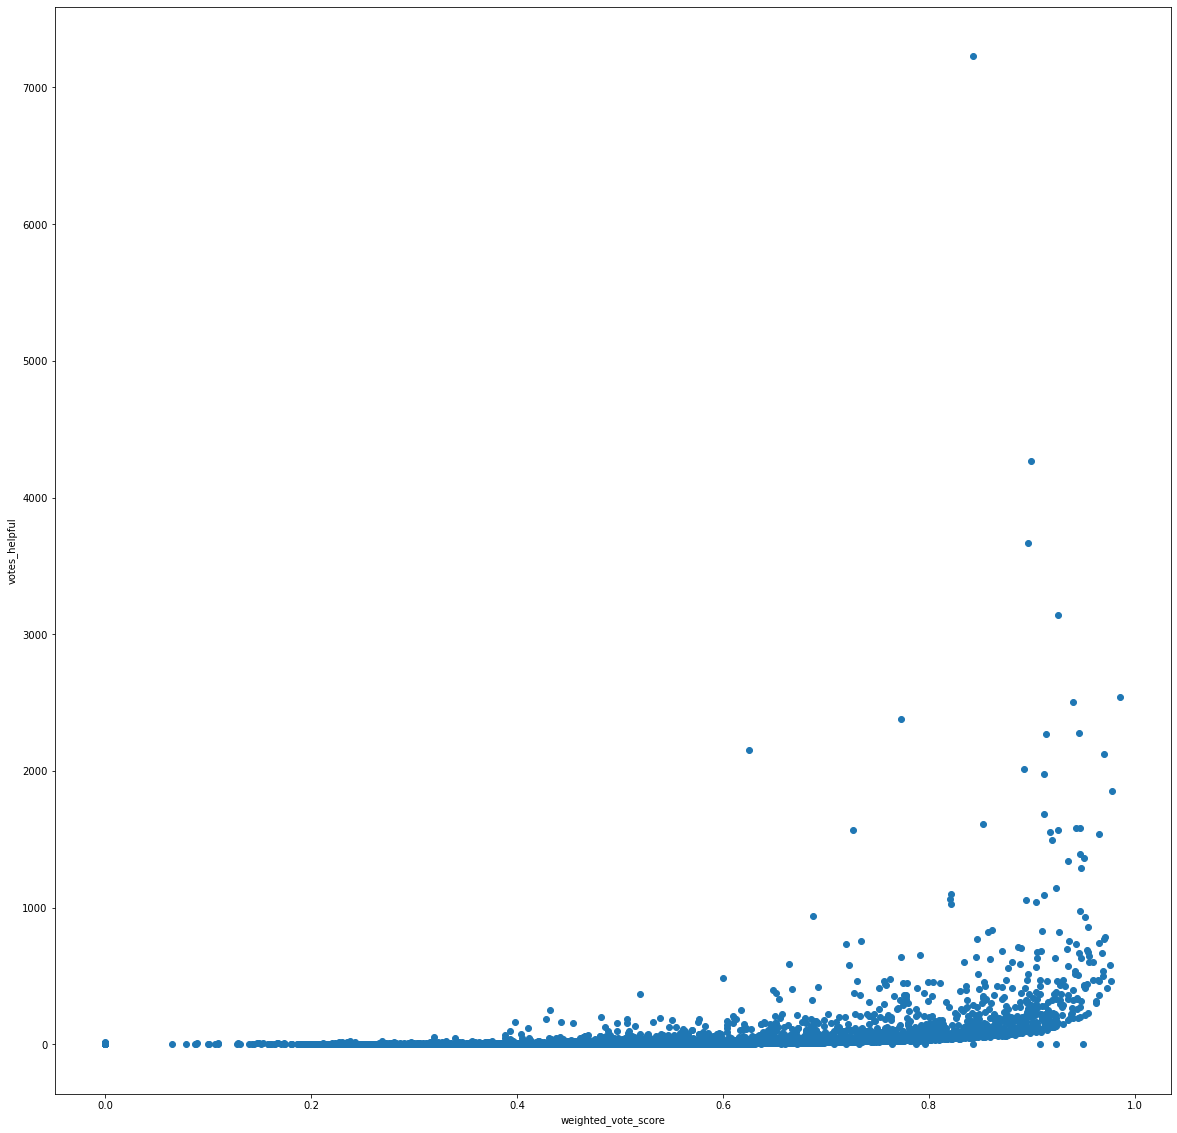

In [ ]:
# In particular, it can be interesting to see how the vote score and if the vote was helpful are related

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(ds['weighted_vote_score'], ds['votes_helpful'])
ax.set_xlabel('weighted_vote_score')
ax.set_ylabel('votes_helpful')
plt.show()

In [ ]:
Outliers can be seen with visualizations using box plots:

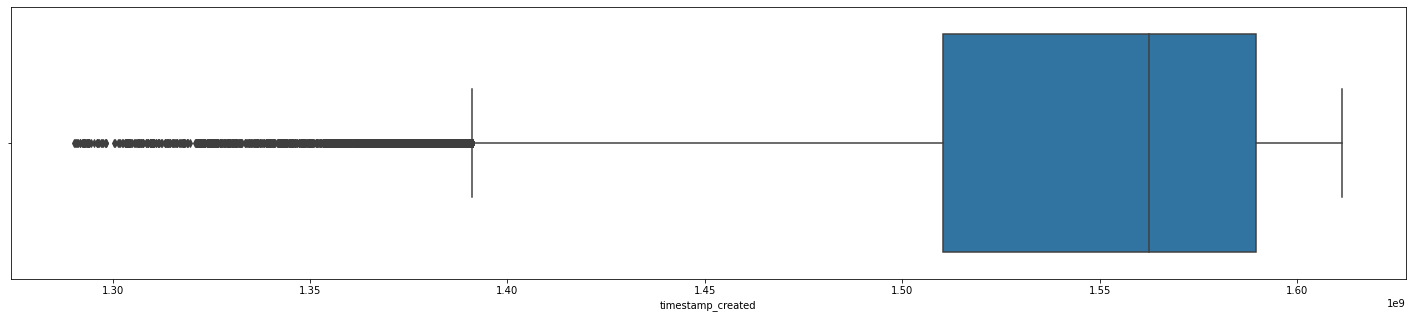

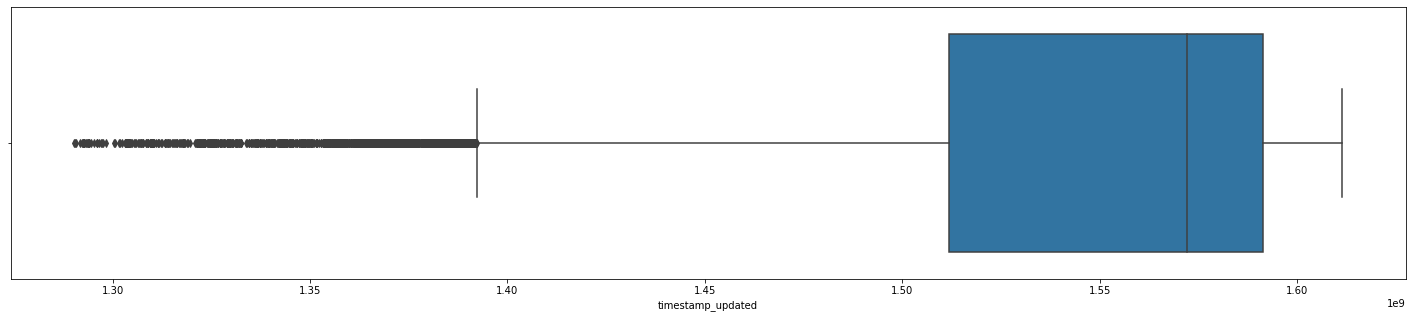

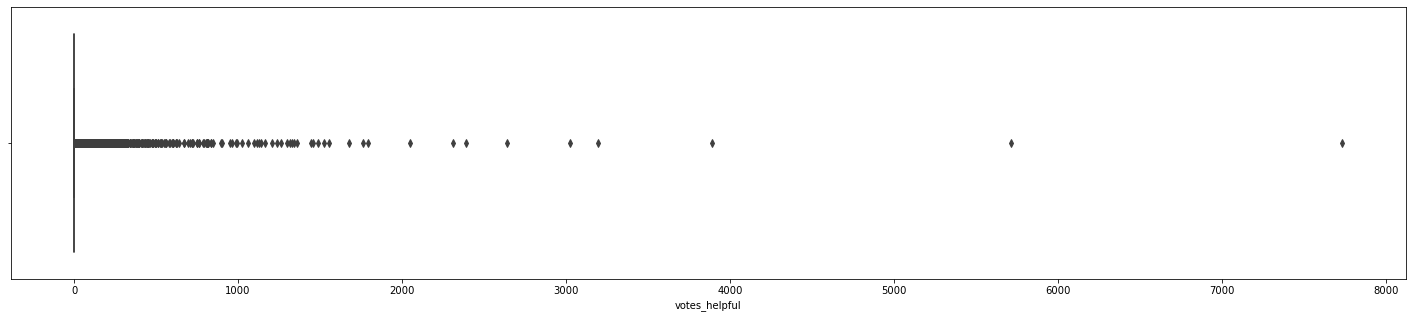

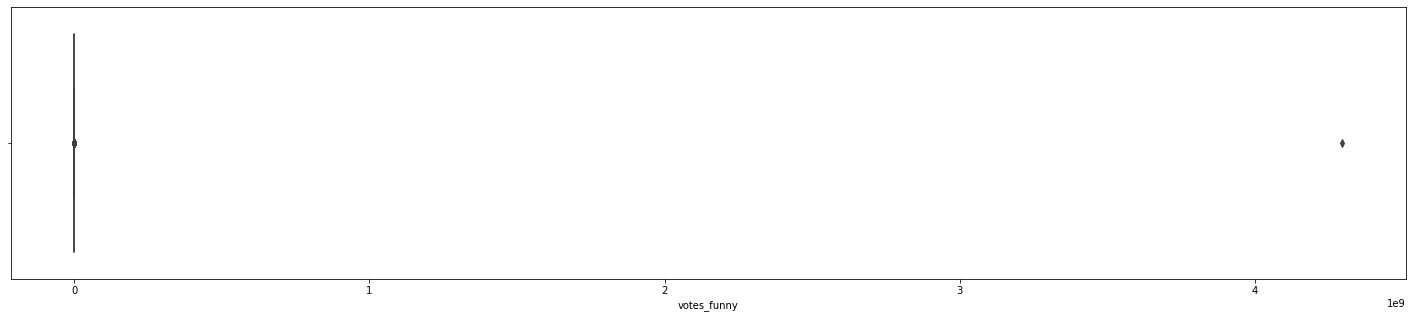

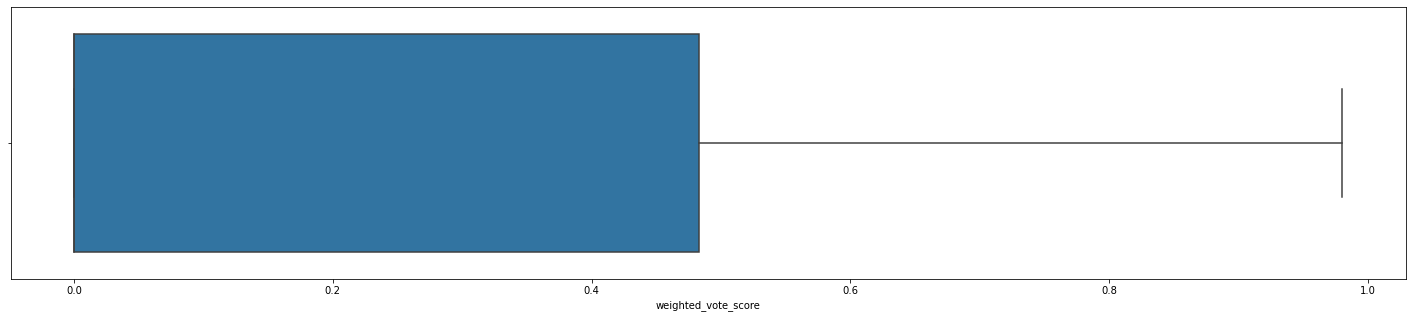

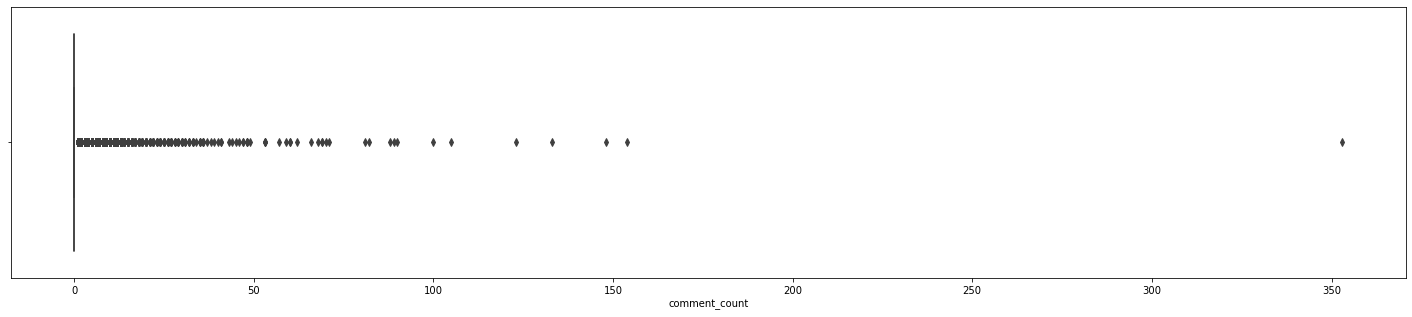

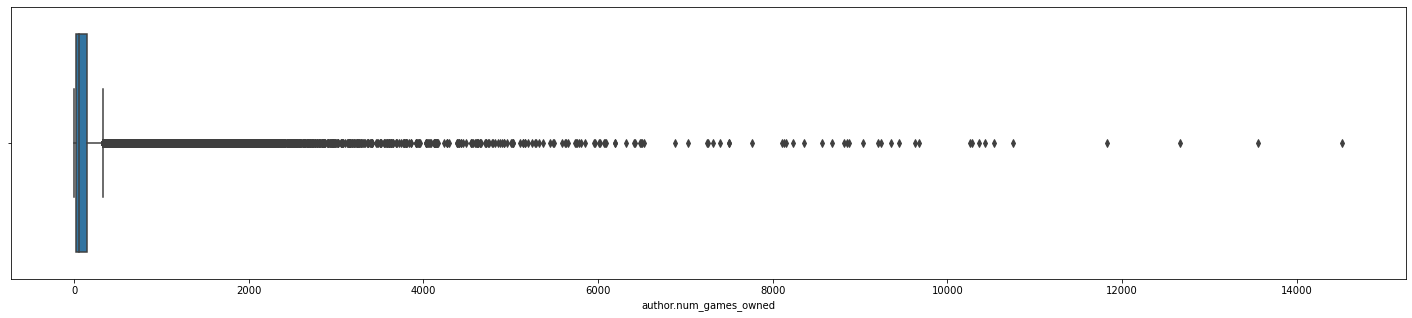

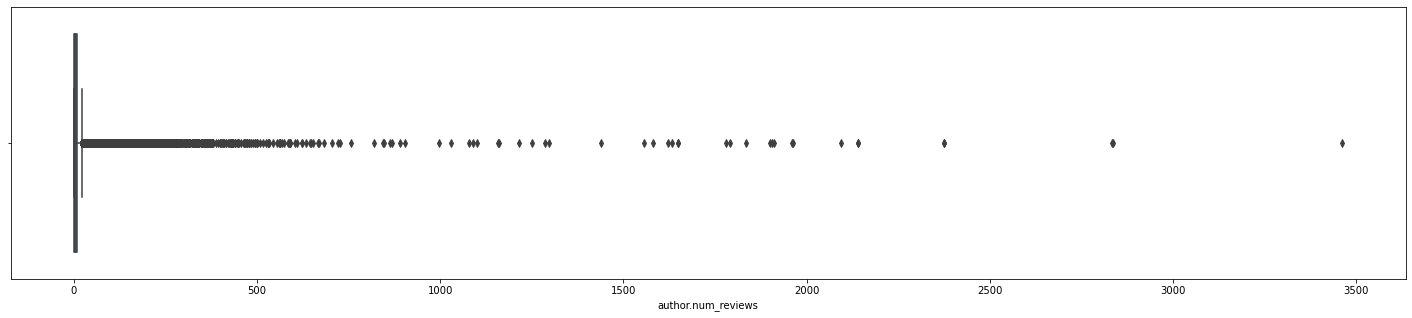

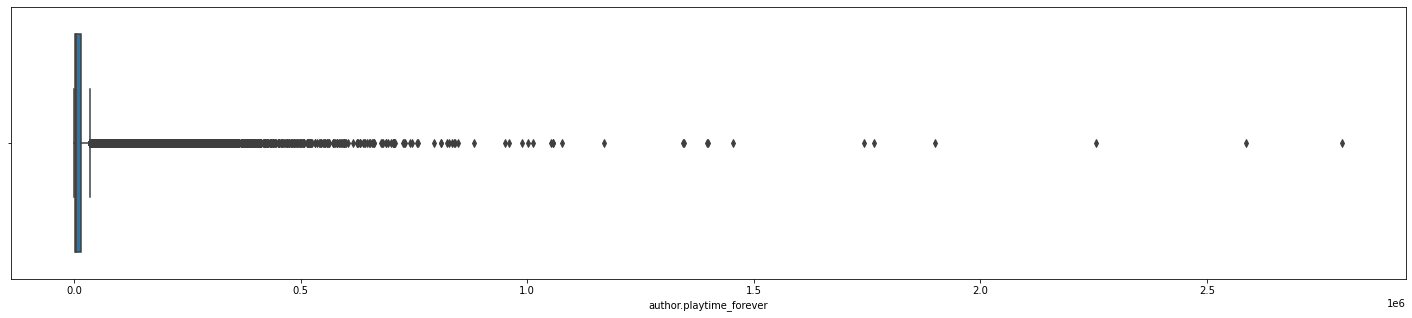

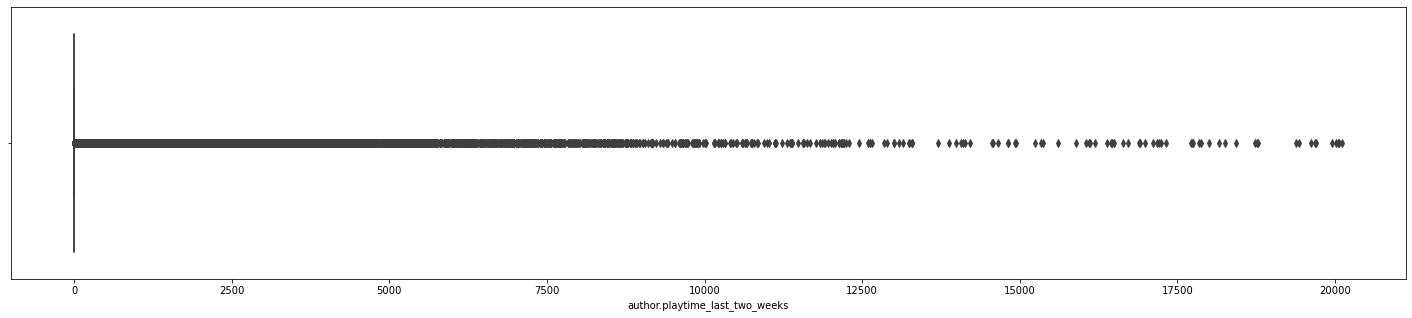

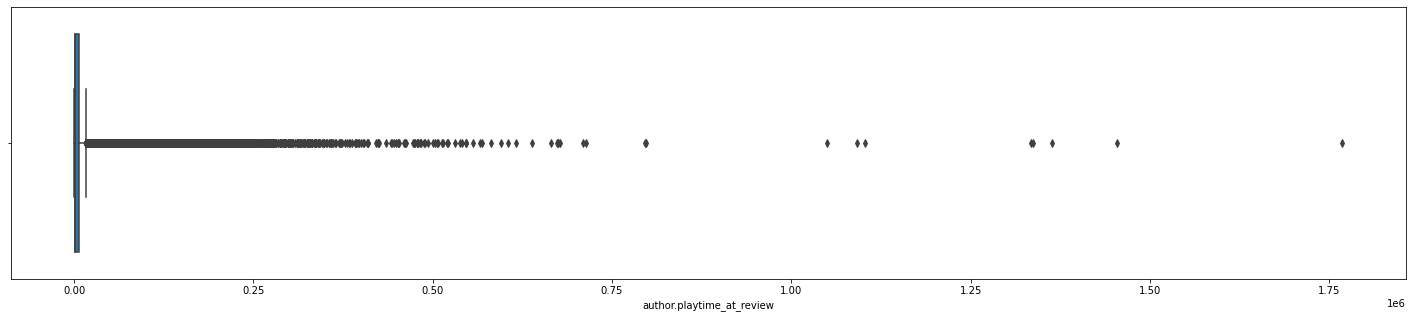

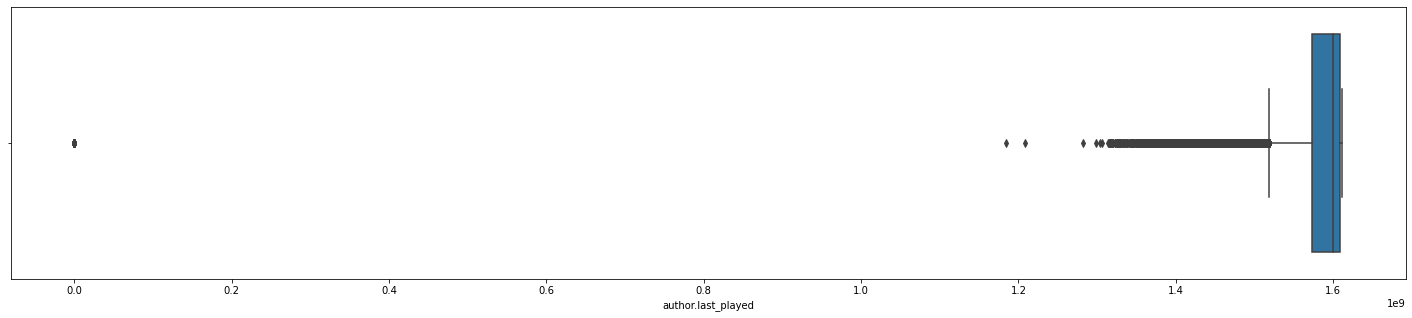

In [68]:
for col in ds_num_no_id:
    fig, ax = plt.subplots(figsize=(25,5))
    sns.boxplot(x=ds_num_no_id[col]).plot(kind='bar', ax=ax)

# RQ2
1. Plot the number of reviews for each application in descending order.
2. What applications have the best Weighted Vote Score?
3. Which applications have the most and the least recommendations?
4. How many of these applications were purchased, and how many were given for free?


## Plot the number of reviews for each application in descending order.

To get the number of reviews in descending order, we grouped the rows by app_name and counted the number of reviews, sorting them in descending order


33742


C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

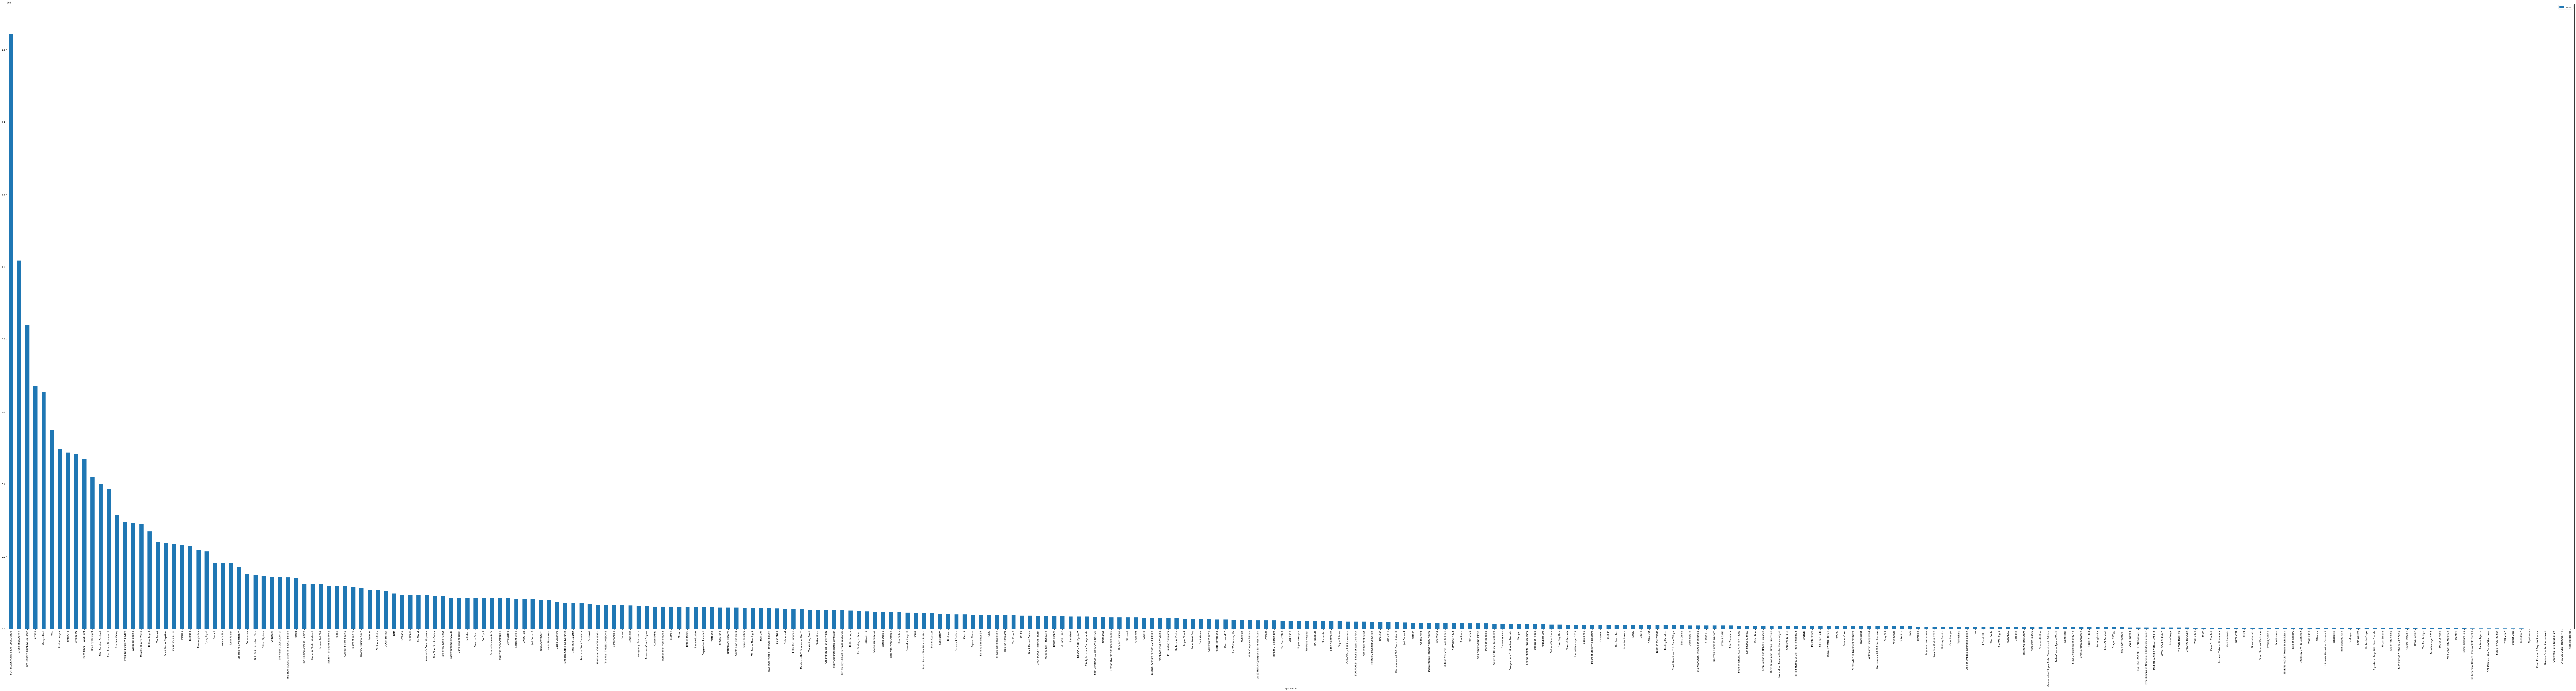

In [70]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["app_name","review"])
    
ds_plot = ds.groupby('app_name')['review'].count().reset_index(name='count')\
                             .sort_values(['count'], ascending=False)
ds_plot.plot(x='app_name',kind='bar',figsize=(200,50))
del ds
#ds_plot.plot(x ='app_name', y='review', kind = 'bar')

## What applications have the best Weighted Vote Score?

To get the applications with the best Weighted Vote Score we have sorted the dataframe in descending order on the Weighted Vote Score column. Once sorted, we extracted the Weighted Vote Score of the first record, which was used to filter the dataframe and thus extract all the names of the apps that have Weighted score equal to that of the first element in the dataframe


In [20]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["app_name","weighted_vote_score"])
best_weighted = ds.sort_values('weighted_vote_score',ascending = False)
highest_score = best_weighted.iloc[0]['weighted_vote_score']
best_weighted_apps = best_weighted.loc[best_weighted['weighted_vote_score'] == highest_score]
best_weighted_apps
del ds

,app_name,weighted_vote_score
5571634,Stardew Valley,0.995987


## Which applications have the most and the least recommendations?

To find the applications with the highest and lowest number of recommendations, we filtered the dataframe by taking all the lines that have *recommended == True*. Once this is done, we have grouped the lines by app_name and made a count, and ordered the dataframe on the value of the count, so that the apps with more recommendations are at the top and those with less at the bottom


In [22]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["app_name","recommended"])

ds_rec = ds.loc[ds['recommended'] == True].groupby(['app_name','recommended'])['recommended'].count().reset_index(name='count')\
                             .sort_values(['count'], ascending=False)

most_least = (ds_rec.iloc[0]['app_name'],ds_rec.iloc[-1]['app_name'])
print(most_least)
del ds

("PLAYERUNKNOWN'S BATTLEGROUNDS", 'Neon Hardcorps')


## How many of these applications were purchased, and how many were given for free?

for this question, filters have been applied to first extract all the apps for free and all the apps purchased. Then, to be more specific, we filtered the dataframe again by searching in the dataframe only the app with most recommendation and the one with least recommendation


In [24]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["app_name","received_for_free"])

ds_free = ds.loc[ds['received_for_free'] == True]
ds_paid = ds.loc[ds['received_for_free'] == False]
ds_free_most = ds_free.loc[ds['app_name'] == most_least[0]]
ds_free_least = ds_free.loc[ds['app_name'] == most_least[1]]
ds_paid_most = ds_paid.loc[ds['app_name'] == most_least[0]]
ds_paid_least = ds_paid.loc[ds['app_name'] == most_least[1]]

print("app received for free: ",len(ds_free['received_for_free']))
print("app paid: ",len(ds_paid['received_for_free']))
print(f"{most_least[0]} most recomendation for free: {len(ds_free_most)}")
print(f"{most_least[1]} least recomendation for free: {len(ds_free_least)}")
print(f"{most_least[0]} most recomendation purchased: {len(ds_paid_most)}")
print(f"{most_least[1]} least recomendation purchased: {len(ds_paid_least)}")
del ds

app received for free:  688061
app paid:  21059310
PLAYERUNKNOWN'S BATTLEGROUNDS most recomendation for free: 61443
Neon Hardcorps least recomendation for free: 27
PLAYERUNKNOWN'S BATTLEGROUNDS most recomendation purchased: 1582812
Neon Hardcorps least recomendation purchased: 173


# RQ3 *Now it's important to understand the preferred time to do reviews.*
1. What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
2. Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
3. Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

	| Initial time | Final time |
    | ----------- | ----------- |
    | 06:00:00 | 10:59:59 |
    | 11:00:00 | 13:59:59 |
    | 14:00:00 | 16:59:59 |
    | 17:00:00 | 19:59:59 |
    | 20:00:00 | 23:59:59 |
    | 00:00:00 | 02:59:59 |
    | 03:00:00 | 05:59:59 |

## What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In this question we first added two new columns: time_created and time_updated. The two columns are formatting the date time to hours and minutes only. We have chosen to interpret writing a review as creating a new review not updating an existing one. So to get the most frequent time when authors write a new review we grouped the dataframe on the new time_created column and made a count. We then sorted the dataframe in descending order so that we could find the time with more written reviews at the top.


In [26]:
#changing the format of timestamp_created,timestamp_created to only hours and minutes
#castiamo gli intervalli a timestamp.
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["timestamp_created","timestamp_updated"],parse_dates=['timestamp_created','timestamp_updated'],date_parser=dateparse)

ds['time_created'] = pd.to_datetime(ds["timestamp_created"], errors='coerce').dt.strftime('%H:%M')
ds['time_updated'] = pd.to_datetime(ds["timestamp_updated"], errors='coerce').dt.strftime('%H:%M')

#grouping by timestamp_created that has the same HH:MM and counting them to get the
ds_most_common_time = ds.groupby(['time_created'])['time_created'].count().reset_index(name='count')\
                             .sort_values(['count'], ascending=False)

ds_most_common_time.iloc[0]['time_created']

'14:50'

In [27]:
del ds
del ds_most_common_time

## Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

The function we created takes as input the dataframe and a pair of times that represent the left boundary and the right boundary of the interval. The function iterates over the rows of the dataframe and checks that the value in the ***timestamp_created*** column is in range. If ***timestamp_created*** is included, the concatenation of the two intervals is added to the new column ***in_interval*** as follows: time left-time right. Once the ***in_interval*** column has been set, it was enough to do a group by on it and count the number of rows.
The function tested on the entire dataset turns out to be slow, as in the loop checks and the assignment of a value to a new column are made. A solution could be to apply the function to chunks of the dataframe, trying to get a speed up. to compensate for the lack of power of our machines we decided to show the plot for a subset of rows chosen randomly, so that it could be an example at least representative of the original dataset.


In [2]:
p = 0.001
ds = pd.read_csv(
         "./archive/steam_reviews.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p,usecols=["timestamp_created"],parse_dates=['timestamp_created'],date_parser=dateparse
)
print(len(ds))

21859


21859


<AxesSubplot:xlabel='in_interval'>

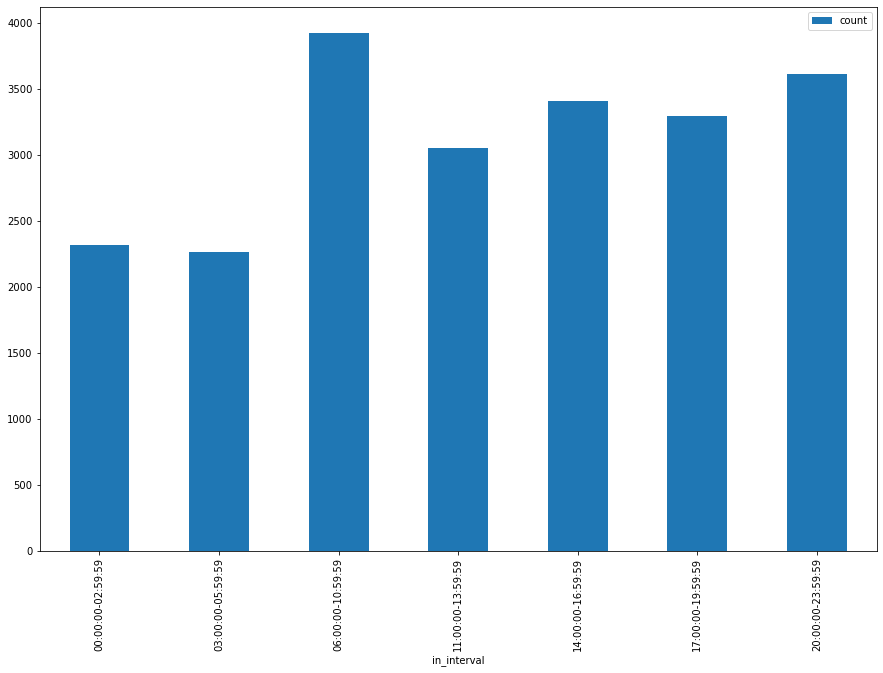

In [9]:
from datetime import datetime as dt
print(len(ds))
def check_intervals(timestamp_created,i):
    left_i = dt.strptime(i[0], '%H:%M:%S').time()
    right_i = dt.strptime(i[1], '%H:%M:%S').time()
    #print(left_i,timestamp_created,right_i)
    if left_i<=timestamp_created.time()<=right_i:
        return str(left_i)+str(right_i)
    else:
        return 0
intervals_list = [("06:00:00","10:59:59"),("11:00:00","13:59:59"),("14:00:00","16:59:59"),("17:00:00","19:59:59"),("20:00:00","23:59:59"),("00:00:00","02:59:59"),("03:00:00","05:59:59")]

def iter_rows_test(df,i):
    left_i = dt.strptime(i[0], '%H:%M:%S').time()
    right_i = dt.strptime(i[1], '%H:%M:%S').time()
    for index, row in df.iterrows():
        if left_i<=row.timestamp_created.time()<=right_i:
            ds.loc[index,'in_interval'] = str(left_i)+"-"+str(right_i)
        

        
#ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["timestamp_created"],parse_dates=['timestamp_created'],date_parser=dateparse)

for i in intervals_list:
    iter_rows_test(ds,i)


ds_intervals = ds.groupby(['in_interval'])['in_interval'].count().reset_index(name='count')\
                             .sort_values(['in_interval'], ascending=True)
ds_intervals.plot(x='in_interval',kind='bar',figsize=(15,10))

# RQ4

In [28]:
import numpy as np
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["language","votes_funny","votes_helpful"])
lis = ds.language.value_counts().index.tolist()[0:3]
print('The three most popular languages are {0}, {1} and {2}\n'.format(lis[0], lis[1], lis[2]))
def getrevbylang(lang: list, dataset):
  """
  This function returns the dataset filtered by languages that appear in lang

  :param lang: list of languages you want to filter by
  :param dataset: dataset you want to filter (the column is called language)
  """
  return dataset[dataset.language.isin(lang)]
a = getrevbylang(lis, ds)
num_funny = np.count_nonzero(a.votes_funny) # counting nonzero values only
print(str(round(num_funny*100/len(a), 2)),'% of reviews are funny') 
num_helpful = np.count_nonzero(a.votes_helpful)
print(str(round(num_helpful*100/len(a),2)), '% of reviews are helpful')
#a.votes_funny[:50]

The three most popular languages are english, schinese and russian

12.21 % of reviews are funny
29.16 % of reviews are helpful


# RQ5 The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

1. Plot the top 10 most popular reviewers and the number of reviews.
2. What applications did the most popular author review?
3. How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
4. How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

## Plot the top 10 most popular reviewers and the number of reviews.

To answer this question we have sorted the dataframe in descending order and we have taken the first 10 lines. After that we plotted the result dataframe with a bar plot. The result shows that two authors have an extremely larger number of reviews than the others (4398046511108,4398046511105).


<AxesSubplot:xlabel='author.steamid'>

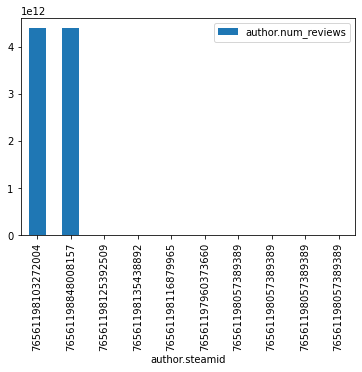

In [29]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["recommended","app_name","author.num_reviews",'author.steamid','author.num_reviews','received_for_free'])

ds_most_popular = ds.sort_values('author.num_reviews',ascending=False)[['author.steamid','author.num_reviews']].drop_duplicates()[0:10]
ds_most_popular
ds_most_popular.plot(x='author.steamid',y='author.num_reviews', kind = 'bar')

#.plot(x='author.steamid',y = 'author.num_reviews')

## What applications did the most popular author review?
We used the dataframe ds_most_popular that contains the 10 most popular reviewers to get the the id of the most popular reviewer most_popular_auth. Once we got the id we used it to filter the rows, ds['author.steamid'] == most_popular_auth and we have selected the column app_name.


In [30]:
most_popular_auth = ds_most_popular.iloc[0][0]
ds.loc[ds['author.steamid'] == most_popular_auth]['app_name']

13093694    Grand Theft Auto V
Name: app_name, dtype: object

## How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

Here we filtered again for *most_popular_auth* and also added the condition that *received_for_free == True*, to get the apps it received for free. To get the apps it paid for we used the condition *received_for_free == False*

In [31]:
free_app = ds.loc[(ds['author.steamid'] == most_popular_auth) & (ds['received_for_free'] == True)]
purchased_app = ds.loc[(ds['author.steamid'] == most_popular_auth) & (ds['received_for_free'] == False)]
print(f"number of app purchased: {len(purchased_app)}: {len(purchased_app)*100//len(purchased_app)+len(free_app)}%")
print(f"number of free app: {len(free_app)}: {len(free_app)*100//len(purchased_app)+len(free_app)}%")

number of app purchased: 1: 100%
number of free app: 0: 0%


## How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [32]:
print(f"app purchased and reviewed positively: {len(purchased_app[ds['recommended'] == True])}")
print(f"app purchased and reviewed negatively: {len(purchased_app[ds['recommended'] == False])}")
print(f"app free and reviewed positively: {len(free_app[ds['recommended'] == True])}")
print(f"app free and reviewed negatively: {len(free_app[ds['recommended'] == False])}") 


app purchased and reviewed positively: 1
app purchased and reviewed negatively: 0
app free and reviewed positively: 0
app free and reviewed negatively: 0


<ipython-input-32-cdcdeda5dd2d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"app purchased and reviewed positively: {len(purchased_app[ds['recommended'] == True])}")
<ipython-input-32-cdcdeda5dd2d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"app purchased and reviewed negatively: {len(purchased_app[ds['recommended'] == False])}")
<ipython-input-32-cdcdeda5dd2d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"app free and reviewed positively: {len(free_app[ds['recommended'] == True])}")
<ipython-input-32-cdcdeda5dd2d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"app free and reviewed negatively: {len(free_app[ds['recommended'] == False])}")


# RQ6

# What is the average time (days and minutes) a user lets pass before he updates a review?

In [34]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["timestamp_created","timestamp_updated"])

time_created = pd.to_datetime(ds["timestamp_created"], unit='s')
time_updated = pd.to_datetime(ds["timestamp_updated"], unit='s')

boolUpdated = (time_updated - time_created) > np.timedelta64(0)
average = (time_updated - time_created)[boolUpdated].mean()
print(average)

321 days 00:46:36.172313920


# Plot the top 3 authors that usually update their reviews.

Text(0, 0.5, 'Number of reviews')

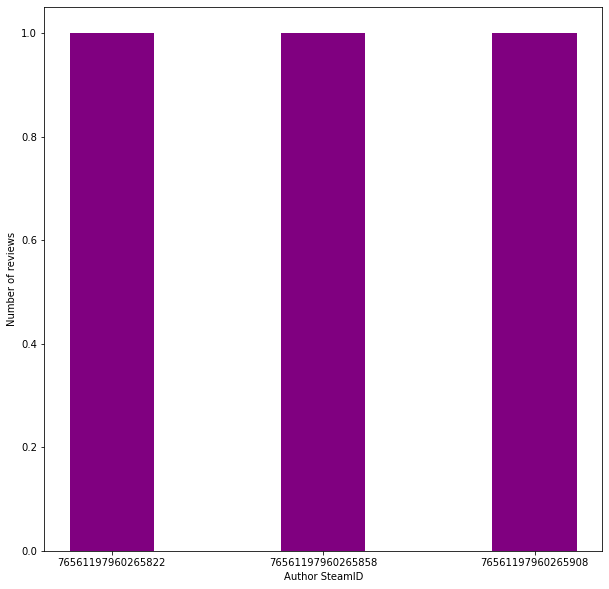

In [37]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["author.steamid","review_id"])

updateCount = ds[boolUpdated].groupby("author.steamid")["review_id"].count()
first_3 = updateCount[:3]

fig = plt.figure(figsize = (10, 10))
plt.bar(list(map(str, first_3.index)), first_3, width=0.4, color='purple')
plt.xlabel('Author SteamID')
plt.ylabel('Number of reviews')
del ds

# RQ 7


In [38]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["weighted_vote_score","votes_funny"])


bigws = ds[ds.weighted_vote_score >= .5] #only considering the values asked
probws = len(bigws)/len(ds)
print('The probability that a review gets a weighted score greater or equal than 0.5 is', round(probws, 2))
probbwfr = len(bigws[bigws.votes_funny > 0])/len(bigws)
print('The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is', round(probbwfr,2))
probfr = len(ds[ds.votes_funny > 0])/len(ds)
if probfr == probbwfr: #A and B are indipendent iff P(A \cap B) = P(A)P(B)
  print('Having a high weighted score and being funny are indipendent events')
else:
  print('Having a weighted score greater than 0.5 and having at least one vote as funny are not indipendent events')

The probability that a review gets a weighted score greater or equal than 0.5 is 0.22
The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 0.25
Having a weighted score greater than 0.5 and having at least one vote as funny are not indipendent events


# RQ8

## Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In order to see if there is a significant difference between the two distributions we can use the Z-test that checks whether two population means are different. Because of the central limit theorem, many test statistics are approximately normally distributed for large samples. To compare the two distribution we choose to remove all rows that contains weighted_vote_score equals to 0 because being many they influence the analysis.

In [40]:
from scipy import stats
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["language","weighted_vote_score"])

ds_w_lang_ru = ds.round(decimals = 3)[(ds['language'] == 'russian')]
ds_w_lang_ch = ds.round(decimals = 3)[(ds['language'] == 'schinese')]
ds_w_lang_ru = ds_w_lang_ru[(ds.weighted_vote_score != 0.000)]
ds_w_lang_ch = ds_w_lang_ch[(ds.weighted_vote_score != 0.000)]

ztest_stats, ztest_pval = sm.stats.weightstats.ztest(ds_w_lang_ru['weighted_vote_score'], ds_w_lang_ch['weighted_vote_score'])

print('z-score:', abs(ztest_stats))
if abs(ztest_stats) < 1.96:
    print('Samples are not similar')
else:
    print('Samples are similar') 
del ds

<ipython-input-40-ddef5b47247f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds_w_lang_ru = ds_w_lang_ru[(ds.weighted_vote_score != 0.000)]
<ipython-input-40-ddef5b47247f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds_w_lang_ch = ds_w_lang_ch[(ds.weighted_vote_score != 0.000)]


z-score: 103.27648526502786
Samples are similar


## Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

There is no significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score: the scatterplot does not show any correlation since the correlation value is very low.

The correlation is -0.035043937860250784


<AxesSubplot:xlabel='interval', ylabel='weighted_vote_score'>

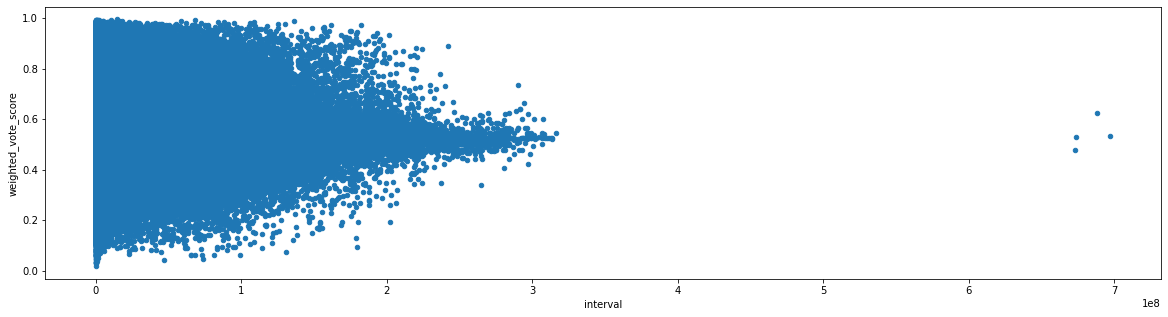

In [43]:
ds = pd.read_csv("./archive/steam_reviews.csv",usecols=["timestamp_created","timestamp_updated","weighted_vote_score","recommended"])

ds['interval'] = ds.timestamp_updated - ds.timestamp_created

ds_score_interval = ds.round(decimals = 3)[['interval', 'weighted_vote_score']]\
                    [((ds.interval != 0.0) & (ds.weighted_vote_score != 0.000))]

ds_score_interval.sort_values(by='interval')

ds_score_interval['interval'] = ds_score_interval['interval'].astype({'interval': 'float64'})

correlation = ds_score_interval['interval'].corr(ds_score_interval['weighted_vote_score'])
print('The correlation is', correlation)
ds_score_interval.plot.scatter(x='interval',y='weighted_vote_score', figsize=(20,5))

# Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

If you include whether an application is recommended or not, the correlation (anti-correlation) doubles but it remains low. The scatterplot does not change much either.

The correlation is -0.07711636534323894


<AxesSubplot:xlabel='interval', ylabel='weighted_vote_score'>

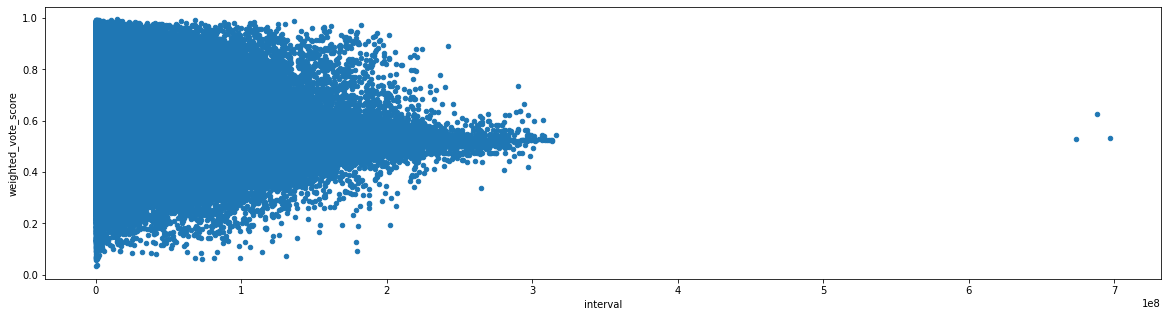

In [44]:
ds['interval'] = ds.timestamp_updated - ds.timestamp_created

ds_score_interval = ds.round(decimals = 3)[['interval', 'weighted_vote_score']]\
                    [((ds.interval != 0.0) & (ds.weighted_vote_score != 0.000) & (ds.recommended == True))]

ds_score_interval.sort_values(by='interval')

ds_score_interval['interval'] = ds_score_interval['interval'].astype({'interval': 'float64'})

correlation = ds_score_interval['interval'].corr(ds_score_interval['weighted_vote_score'])
print('The correlation is', correlation)
ds_score_interval.plot.scatter(x='interval',y='weighted_vote_score', figsize=(20,5))

If you include whether an application is recommended or not, the correlation (anti-correlation) doubles but it remains low. The scatterplot does not change much either.

# What are histograms, bar plots, scatterplots and pie charts used for?

Histograms, bar plots, scatterplots and pie charts are all statistical graphics used to visualize data.
In particular histograms, scatterplots and pie chart are used to visualize numerical data, while bar plots help visualizing categorical data. Histograms and bar plots illustrate the frequency of data in the same way, but histograms are for numerical ones while bar plots for categorical ones. Pie charts display frequencies too, but they must be contained in the cirle area, thus showing a proportion instead of their absolute frequency.
Scatterplots instead show data as a collection of points in a 2D or 3D Cartesian plane, each point having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. They are useful to see if the variables show some kind of correlations.

# What insights can you extract from a Box Plot?

From box plots we can understand how data can be divided through their quartiles. The box is made of 3 quartiles: Q1 which is the smallest number between the minimum value and the median, such that 25% of data is below it; Q2 is instead the median, where 50% of data lies below it and Q3 is the middle value between the median and the largest value, such that 75% of data lies below it. Variability outside the interquantile range (Q3 - Q1), which forms the box, is represented with extending lines. Above and below them, outliers are plotted as single points. The space between the different quartiles helps understand data dispersion and skewness, so to evaluate estimators like the interquartile range, midhinge, range, mid-range and trimean.

#TQ1


## What does the algorithm compute?
returns the smallest kth element of the list.

## What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

the algorithm is not asured to end, because it could choose as s the biggest value, and the list L is always the same as A


## What is asymptotically the running time of the algorithm in the best case?

in the best case,when k is equal to r, the running time is N because is the time that algorithm needs to create the 2 list L and R.


# TQ2
## How much running time does it take to execute splitSwap(a, 0, n)?
We can observe that the cost for swaplist is $\theta(n/2)$, leaving us with the recursive equation $T(n)=1+n/2+2T(n/2)$. 

We get that \\
$
T(n)=1+n/2+2T(n/2)=1+n/2+2(1+n/4+2T(n/8))=...=\sum_{i=0}^{\log n} 2^i + (n/2) \log n = 2n+(n/2)\log n$
making the total cost $\theta (n\log n)$. 
## What does this algorithm do? Is it optimal?
What this algorithm does is splitting and re-assembling a list switching the two parts. Between the moment the list is split and re-assembled the program calls itself, so the splitting keeps happening until the lists are 1 element long. Each recursion ends gluing the two halves it has putting the second one first. 
This algorithm is not very efficient: a very quick way to improve it is by changing swaplist. What this subfunction does is switching every element of the two lists, without fully using the fact that each sublist remains unchanged. Instead of element wise-operations it should be faster to copy the two lists (as lists) and concatenate them in the new order:

`function swapList(a, l, n):

  first = a[l:n/2]

  second = a[n/2: n/2 + n/2]

  a = a[:l]+second+first+a[n/2+n/2:]`

  Assuming all these operation have constant cost, this function would also become constant, making the overall cost of the algorithm linear


# TQ3

1. 
max weight = 5
(weight,value): (1,1) (1,1) (1,1) (1,1) (1,1) (2,1000)


2. 
max weight = 3
(weight,value): (3,1) (1,0.9) (1,0.9) (1,0.9)


3. 
max weight = 3
(weight,value): (1,2) (1,2) (3,5)